In [550]:
import mdptoolbox.mdp as mdp
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [551]:
# El siguiente código lee el goal y el mapa del fichero

def lee_mapa(fichero):
    with open(fichero,'r') as archivo:
        lineas = archivo.readlines()
    numeros = [float(numero) for numero in lineas[0].split()]
    lineas.pop(0)
    lineas.reverse()
    matriz = []
    for linea in lineas:
        fila = [int(caracter) for caracter in linea.strip()]
        matriz.append(fila)
    return np.array(matriz),(numeros[0],numeros[1])

In [552]:
def visualiza_mapa(mapa,destino):
    plt.figure(figsize=(len(mapa[0]), len(mapa)))
    plt.imshow(1-mapa, cmap='gray', interpolation='none')
    plt.xlim(-0.5, len(mapa[0]) - 0.5) # vemos que se puede omitir
    plt.ylim(-0.5, len(mapa) - 0.5) # vemos que se puede omitir
    plt.gca().add_patch(plt.Rectangle((destino[0] - 0.5, destino[1] - 0.5), 1, 1, edgecolor='black', facecolor='red', lw=5))

In [553]:
def genera_estados(mapa):
    estados = []
    for i in range(0,mapa.shape[1]):
        for j in range(0,mapa.shape[0]):
            estados.append(tuple([i,j]))
    return estados

In [554]:
def es_obstaculo(estado,mapa):
    return mapa[estado[1],estado[0]] == 1

In [555]:
acciones = ['esperar','N','NE','E','SE','S','SO','O','NO']

In [556]:
def aplica_accion(estado,accion,mapa):
    if es_obstaculo(estado,mapa):
        return estado
    x = estado[0]
    y = estado[1]
    
    if accion == 'N':
        y += 1
    elif accion == 'S':
        y -= 1
    elif accion == 'E':
        x += 1
    elif accion == 'O':
        x -= 1
    elif accion == 'NE':
        y += 1
        x += 1
    elif accion == 'SE':
        y -= 1
        x += 1
    elif accion == 'SO':
        y -= 1
        x -= 1
    elif accion == 'NO':
        y += 1
        x -= 1
    return x,y

In [557]:
def obtiene_posibles_errores(accion):
    if accion=='N':
        errores = ['NE','NO']
    elif accion=='S':
        errores = ['SE','SO']
    elif accion=='E':
        errores = ['NE','SE']
    elif accion=='O':
        errores = ['NO', 'SO']
    elif accion=='NE':
        errores = ['N','E']
    elif accion=='NO':
        errores = ['N','O']
    elif accion=='SE':
        errores = ['S','E']
    elif accion == 'SO':
        errores = ['S','O']
    else:
        errores = []
    return errores

In [558]:
K = 1000
def obtiene_recompensa(estado,destino,mapa):
    if es_obstaculo(estado,mapa):
        valor = -K
    else:
        valor = - np.sqrt((estado[0]-destino[0])**2 + (estado[1]-destino[1])**2)
    return valor

In [559]:
def visualiza_recompensas(estados,destino,mapa):
    visualiza_mapa(mapa,destino)
    recompensas = [obtiene_recompensa(estado,destino,mapa) for estado in estados]
    recompensas = [np.nan if elemento == -1000 else elemento for elemento in recompensas] # para que no pinte los obstaculos
    max_recompensa = np.nanmax(recompensas)
    min_recompensa = np.nanmin(recompensas)
    for e in estados:
        r = obtiene_recompensa(e,destino,mapa)
        if r == -1000:
            continue
        a = (r-min_recompensa)/(max_recompensa-min_recompensa)
        rect = plt.Rectangle((e[0] - 0.5, e[1] - 0.5),1,1, alpha = a, linewidth=1, edgecolor='black', facecolor='green')
        plt.gca().add_patch(rect)
        plt.gca().add_patch(plt.Rectangle((destino[0] - 0.5, destino[1] - 0.5), 1, 1, edgecolor='black', facecolor='red', lw=5))

In [560]:
def crea_recompensas_sistema(estados,destino,mapa,acciones):
    matriz = []
    for e in estados:
        r = obtiene_recompensa(e,destino,mapa)
        fila = [r]*len(acciones)
        if e != destino:
            fila[0]=-100
        matriz.append(fila)
    return np.array(matriz)

In [561]:
def visualiza_politica(politica,mapa,destino,estados):
    visualiza_mapa(mapa,destino)
    for p in zip(estados,politica):
        accion = p[1]
        if accion=='esperar':
            continue
        estado = p[0]
        e1 = aplica_accion(estado,accion,mapa)
        x0 = estado[0]
        y0 = estado[1]
        x1 = e1[0]
        y1 = e1[1]
        
        plt.gca().arrow(x0, y0, (x1 - x0)*0.6, (y1 - y0)*0.6,
         head_width=0.3, head_length=0.3, fc='black', ec='black')

In [562]:
mapa,destino = lee_mapa("../data/map1.txt")

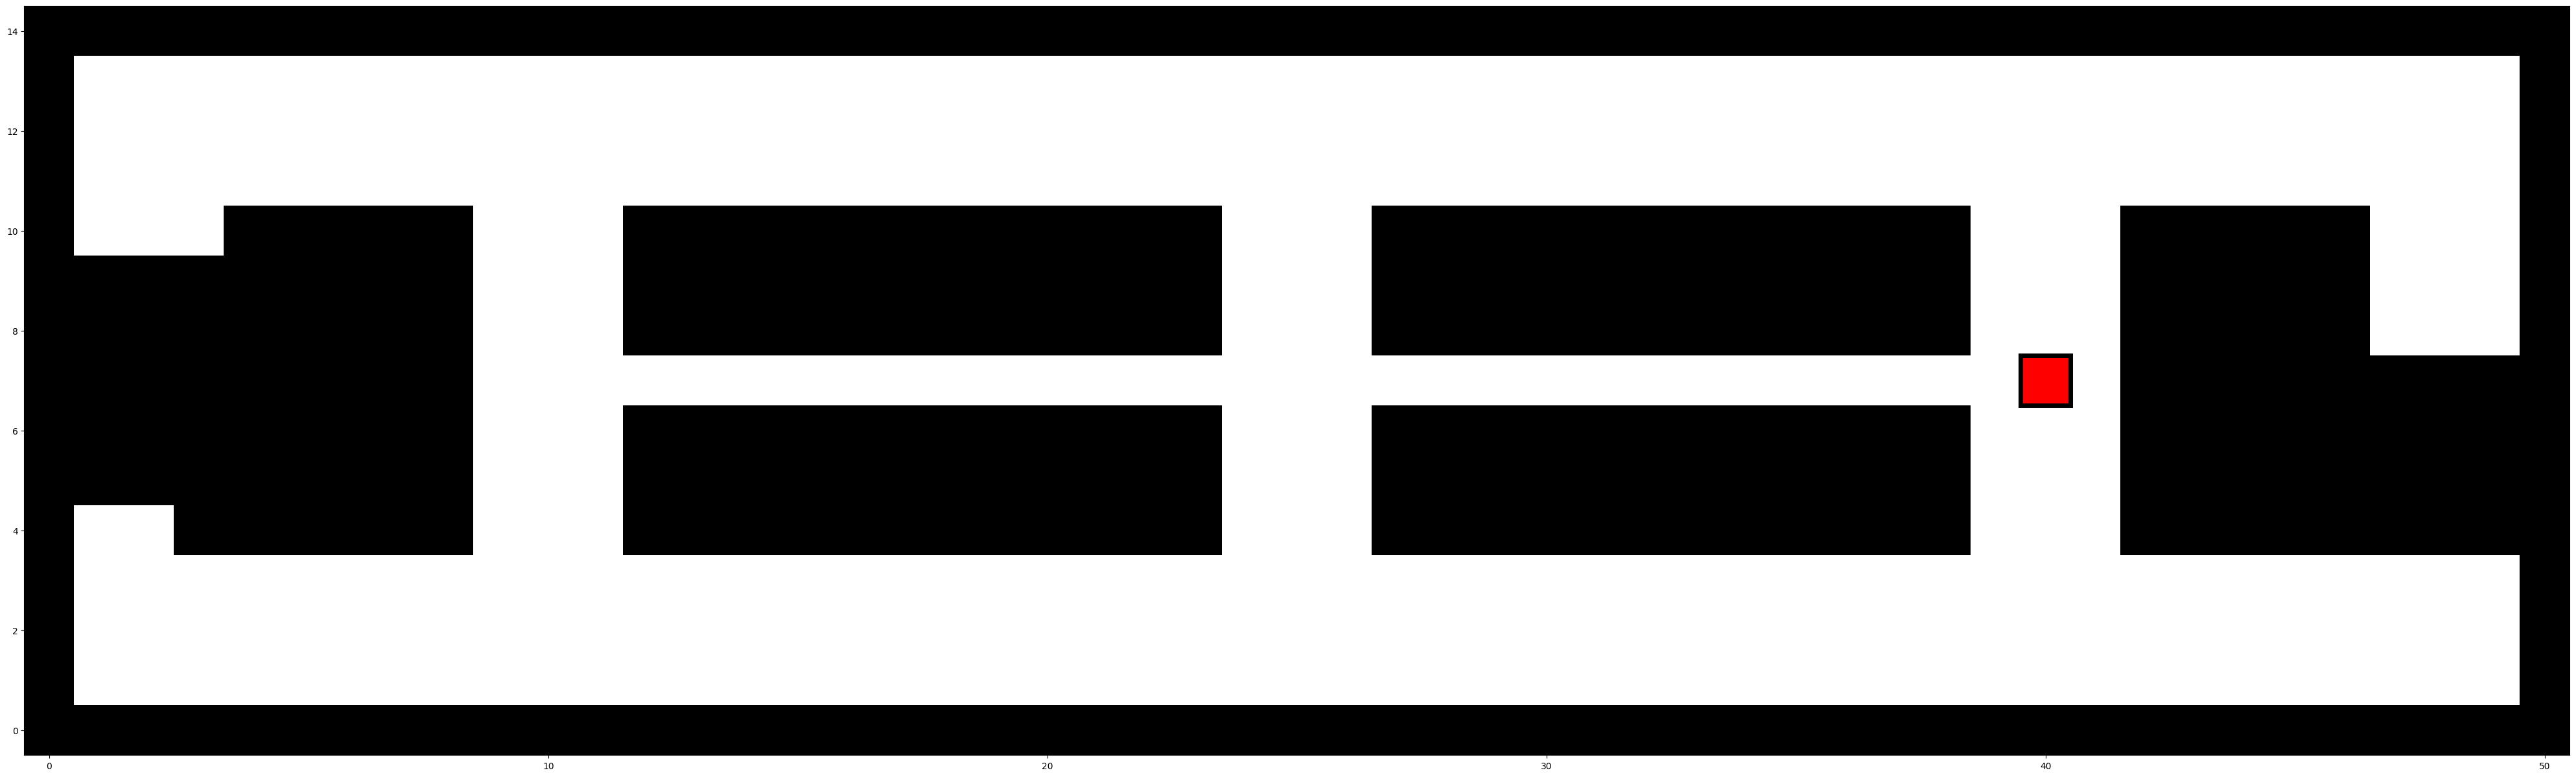

In [563]:
visualiza_mapa(mapa,destino)

In [564]:
estados = genera_estados(mapa)


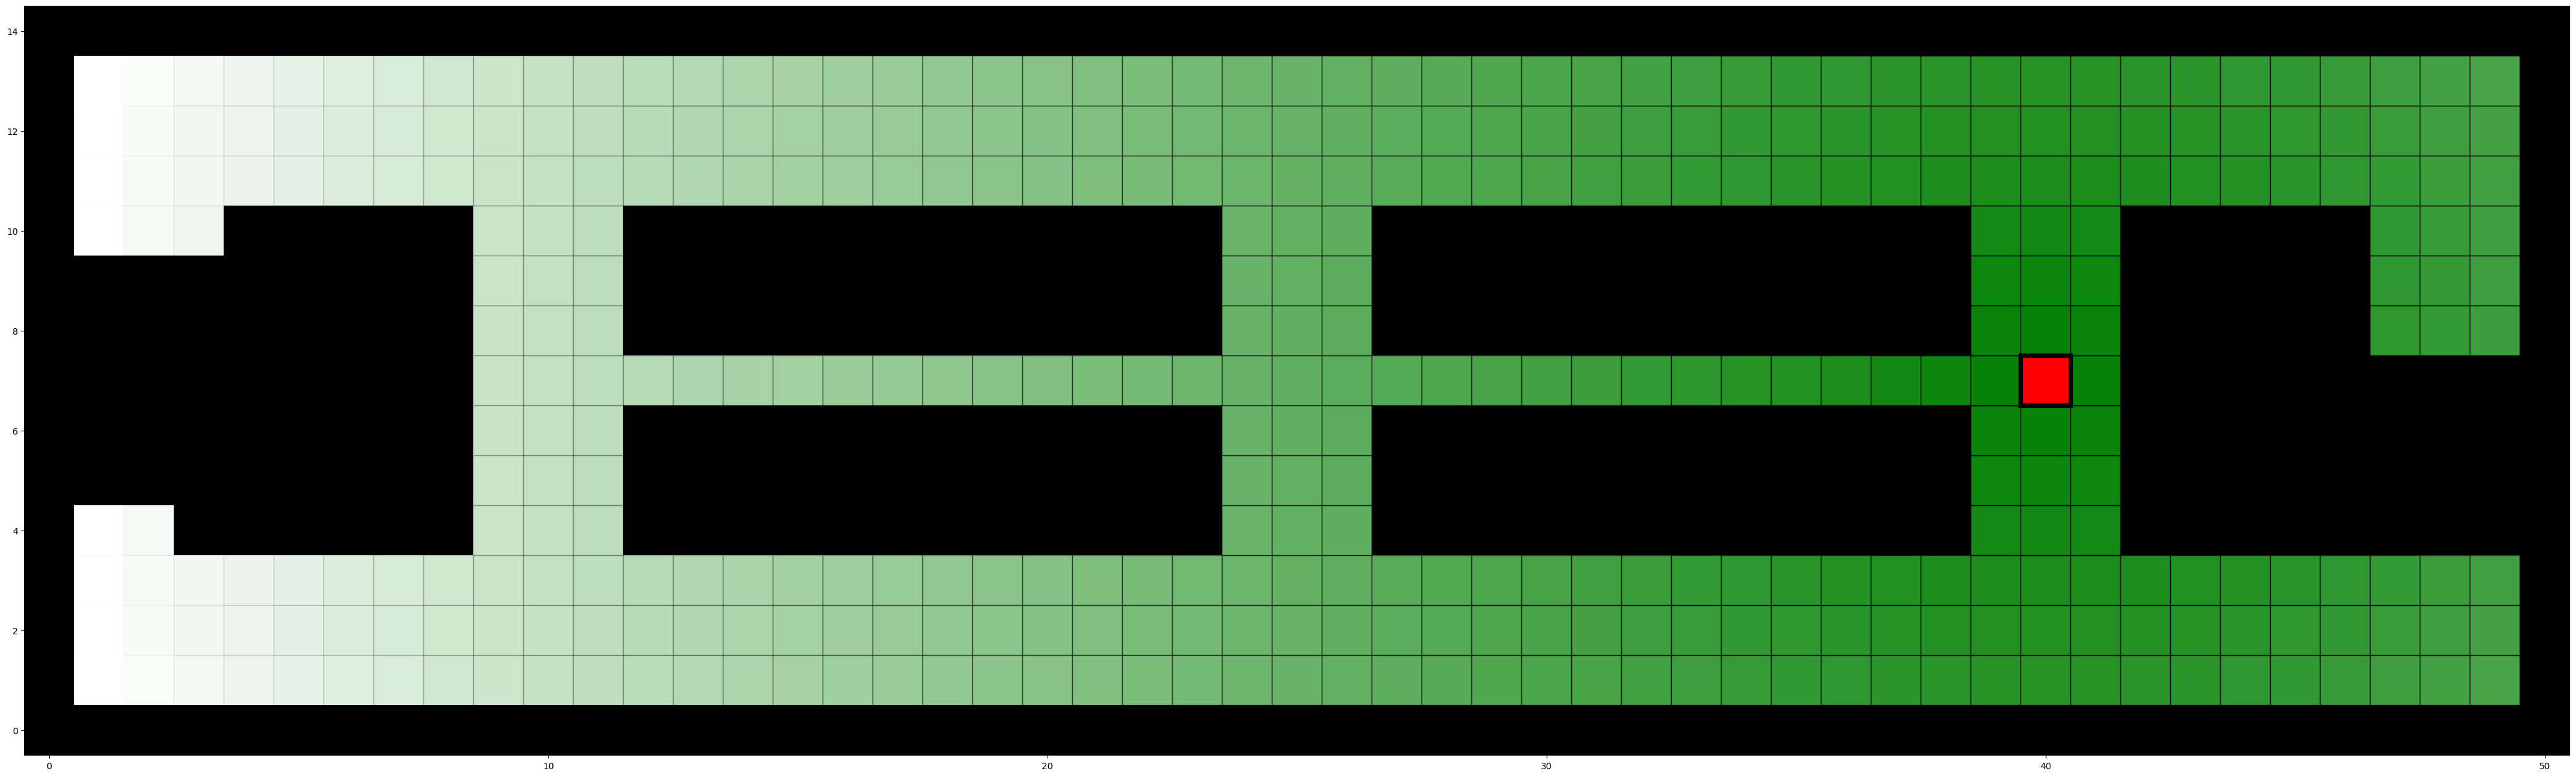

In [565]:
visualiza_recompensas(estados,destino,mapa)

In [566]:
nav_recompensas_sistema = crea_recompensas_sistema(estados,destino,mapa,acciones)

# ahora hacemos algo auxiliar para ver las recompensas
df = pd.DataFrame(nav_recompensas_sistema, columns=acciones)
df['estados'] = estados

df

,esperar,N,NE,E,SE,S,SO,O,NO,estados
0,-100.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,"(0, 0)"
1,-100.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,"(0, 1)"
2,-100.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,"(0, 2)"
3,-100.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,"(0, 3)"
4,-100.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,"(0, 4)"
...,...,...,...,...,...,...,...,...,...,...
760,-100.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,"(50, 10)"
761,-100.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,"(50, 11)"
762,-100.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,"(50, 12)"
763,-100.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,"(50, 13)"


In [567]:
def obtiene_indice_estado(estado):
    return int(estado[0]*mapa.shape[0]+estado[1])

In [568]:
# ahora podemos hacer la matriz de transición SXS 
def crea_transiciones_movimiento(accion, prob_error,estados,mapa):
    matriz = []
    for e0 in estados:
        fila = [0]*len(estados)
        if es_obstaculo(e0,mapa):
            fila[obtiene_indice_estado(e0)]=1
        else:
            goal = aplica_accion(e0,accion,mapa)
            errores = obtiene_posibles_errores(accion)
            if len(errores)==0:
                fila[obtiene_indice_estado(goal)] = 1
            else:
                fila[obtiene_indice_estado(goal)] = 1 - prob_error
                for error in errores:
                    goal_error = aplica_accion(e0,error,mapa)
                    fila[obtiene_indice_estado(goal_error)] = prob_error/len(errores)
        matriz.append(fila)
    return np.array(matriz)

In [569]:
test = crea_transiciones_movimiento('N',0.2,estados,mapa)
print(test[0,0])
print(test[obtiene_indice_estado((10,7)),obtiene_indice_estado((10,8))])
print(test[obtiene_indice_estado((10,7)),obtiene_indice_estado((9,8))])
print(test[obtiene_indice_estado((10,7)),obtiene_indice_estado((11,8))])

1.0
0.8
0.1
0.1


In [570]:
## TODAS LAS TRANSICIONES DEL SISTEMA

def crea_transiciones_sistema(prob_error,estados,mapa):
    return np.array([crea_transiciones_movimiento('esperar',prob_error,estados,mapa), 
                     crea_transiciones_movimiento('N',prob_error,estados,mapa),
                     crea_transiciones_movimiento('NE',prob_error,estados,mapa),
                     crea_transiciones_movimiento('E',prob_error,estados,mapa),
                     crea_transiciones_movimiento('SE',prob_error,estados,mapa),
                     crea_transiciones_movimiento('S',prob_error,estados,mapa),
                     crea_transiciones_movimiento('SO',prob_error,estados,mapa),
                     crea_transiciones_movimiento('O',prob_error,estados,mapa),
                     crea_transiciones_movimiento('NO',prob_error,estados,mapa)])

In [571]:
nav_transiciones_sistema = crea_transiciones_sistema(0.2,estados,mapa)

In [572]:
indices_nav_acciones = {'esperar': 0, 'N': 1, 'NE': 2, 'E': 3, 'SE': 4, 'S': 5, 'SO': 6, 'O': 7, 'NO': 8}

In [573]:
ejemplo_q_learning_nav_robot = mdp.QLearning(
    transitions=nav_transiciones_sistema,
    reward=nav_recompensas_sistema,
    discount=0.9,
    n_iter=1000000
)

ejemplo_q_learning_nav_robot.run()

In [544]:
def crea_politica_greedy(estados,acciones,mapa,destino):
    p = []
    for e in estados:
        valores = []
        for a in acciones:
            e1 = aplica_accion(e,a,mapa)
            valores.append(obtiene_recompensa(e1,destino,mapa))
        accion = acciones[np.argmax(valores)]
        p.append(accion)
    return p

In [545]:
politica_por_defecto = np.array([indices_nav_acciones[x] for x in politica_greedy])
ejemplo_nav_robot_policy_iteration = mdp.PolicyIteration(
    transitions=nav_transiciones_sistema,
    reward=nav_recompensas_sistema,
    discount=0.9,
    policy0=politica_por_defecto
)
ejemplo_nav_robot_policy_iteration.setVerbose()
ejemplo_nav_robot_policy_iteration.run()

  Iteration		Number of different actions
    1		  247
    2		  156
    3		  59
    4		  8
    5		  3
    6		  1
    7		  0
Iterating stopped, unchanging policy found.


In [546]:
politica_greedy = crea_politica_greedy(estados,acciones,mapa,destino)

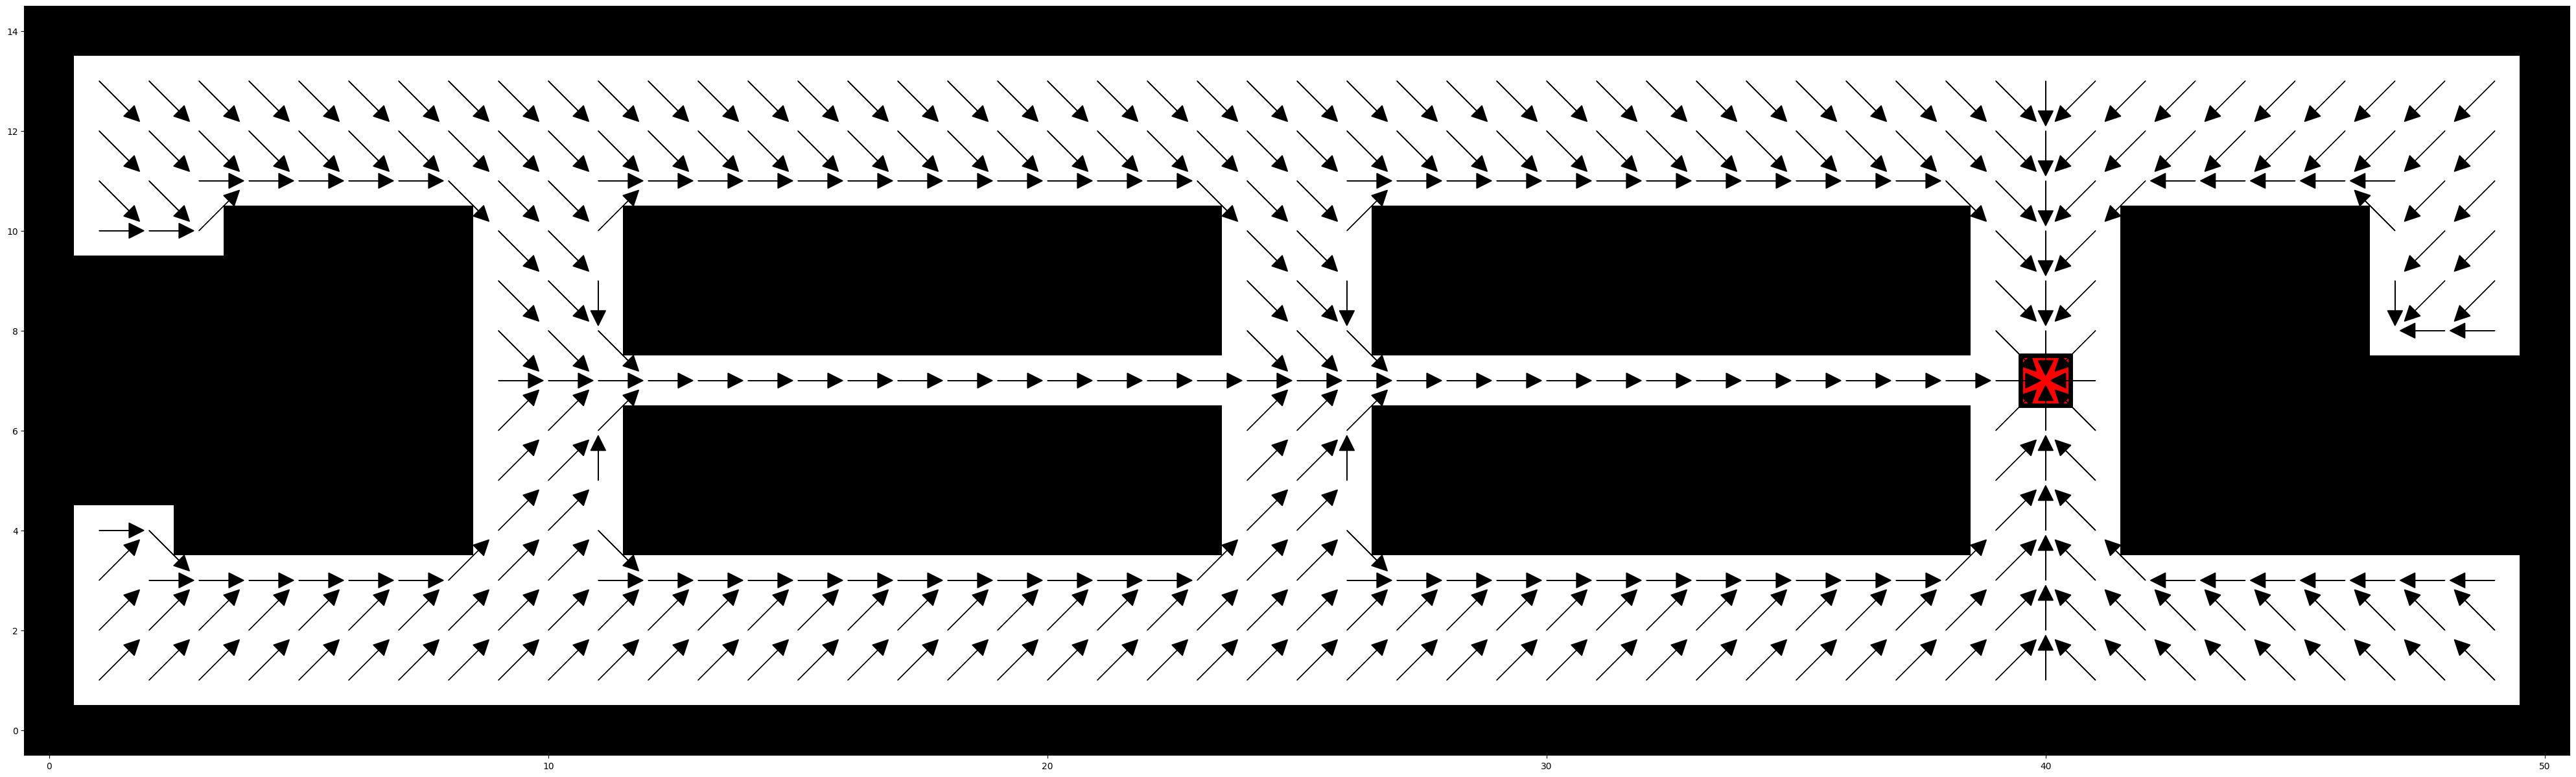

In [539]:
visualiza_politica(politica_greedy,mapa,destino,estados)

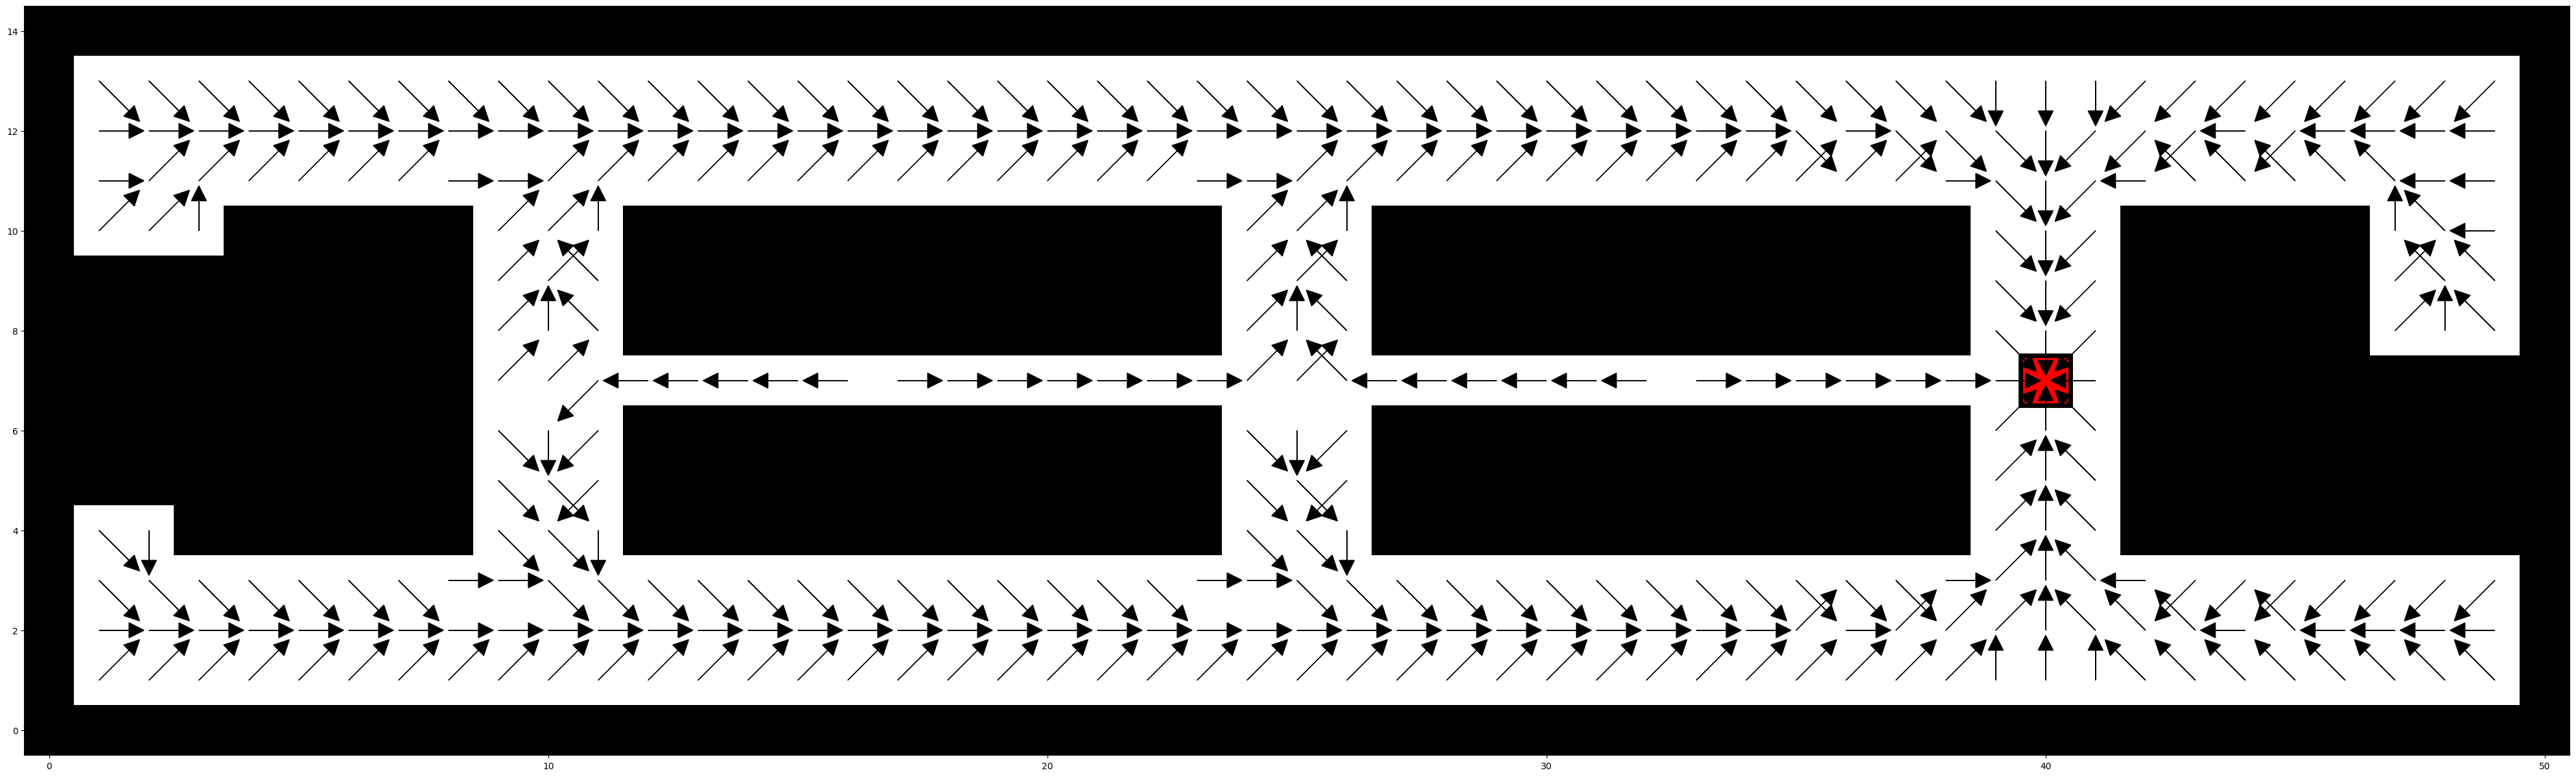

In [547]:
politica_policy_iteration = [acciones[i] for i in ejemplo_nav_robot_policy_iteration.policy]
visualiza_politica(politica_policy_iteration,mapa,destino,estados)

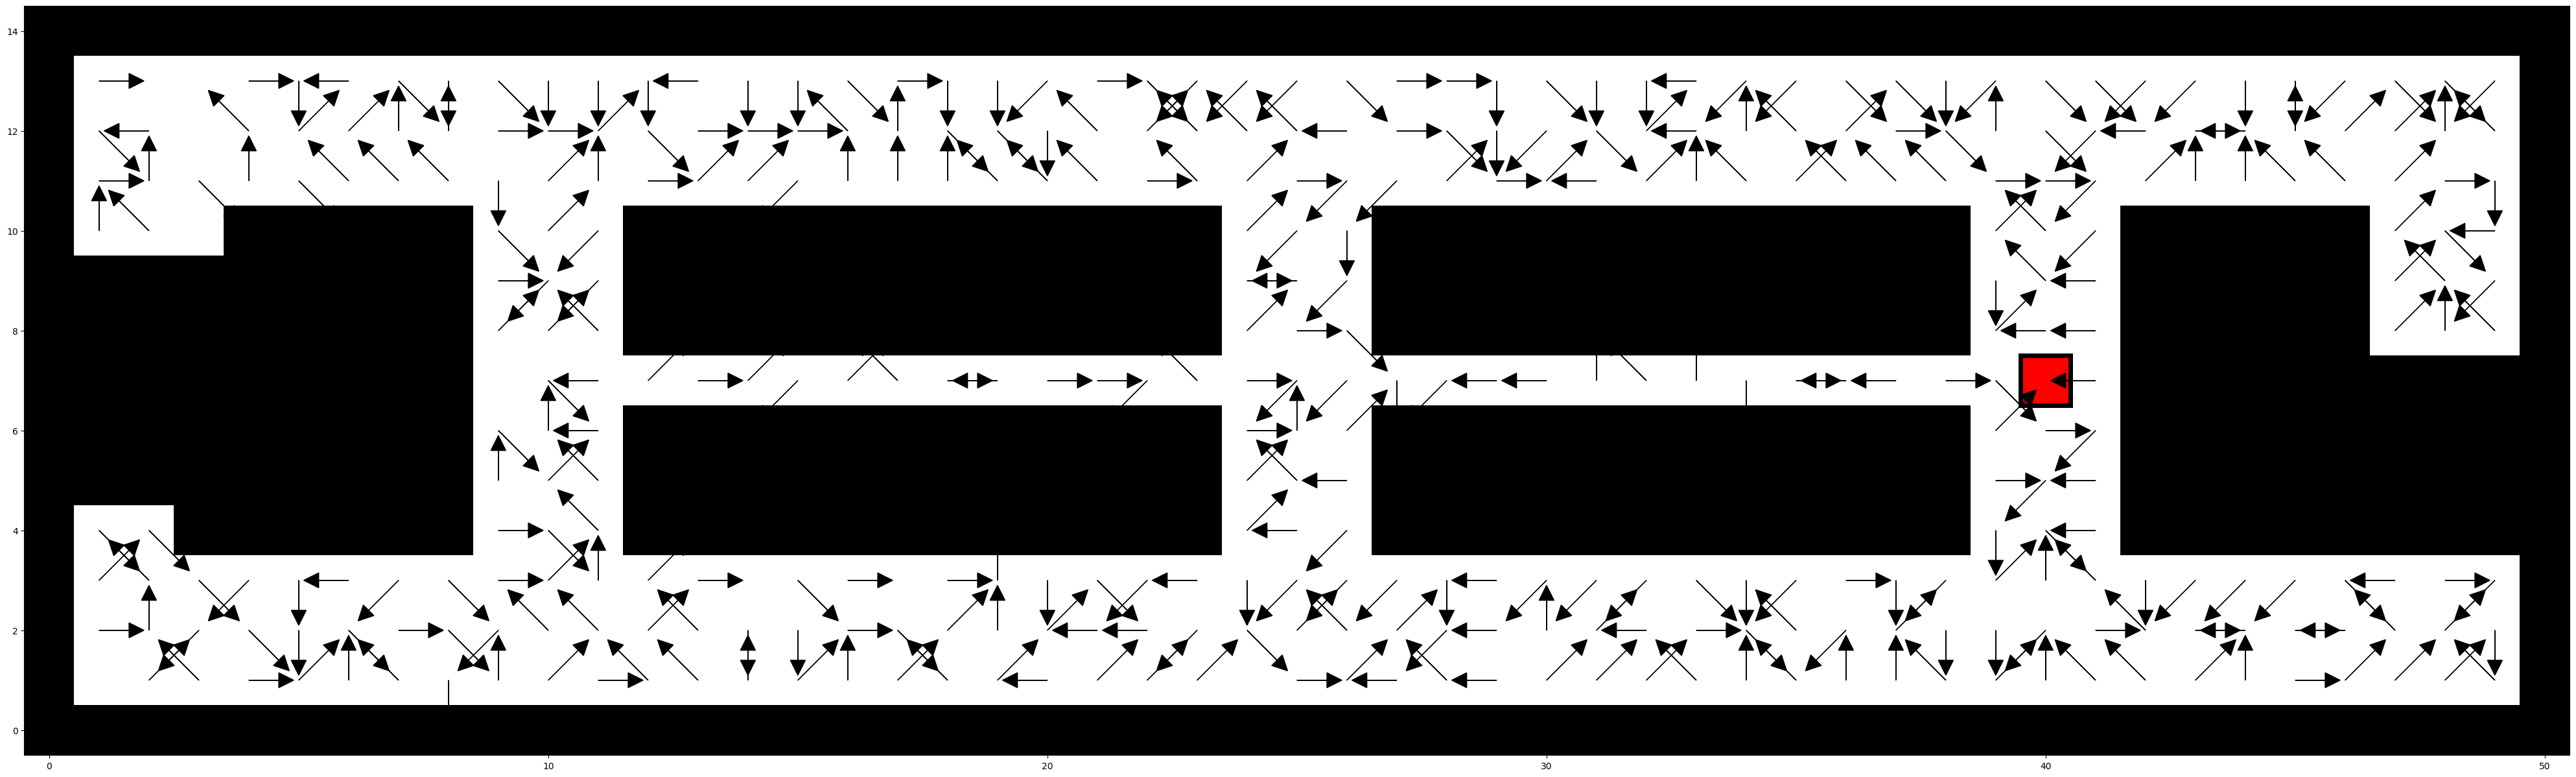

In [574]:
politica_q_learning = [acciones[i] for i in ejemplo_q_learning_nav_robot.policy]
visualiza_politica(politica_q_learning,mapa,destino,estados)